In [82]:
from pathlib import Path

import faiss
import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt
from sklearn.cluster import OPTICS, k_means
import pandas as pd
from sklearn.manifold import TSNE

import amazon_dataset

In [27]:
DATASET = 'Clothing_Shoes_and_Jewelry'

IMAGE_FEATURES = Path(f'data/{DATASET}/embed_image.npy')
TEXT_FEATURES = Path(f'data/{DATASET}/embed_text.npy')

In [31]:
def get_matrix(features_file: Path):
    features = np.load(features_file)
    return features

image_features = get_matrix(IMAGE_FEATURES)
image_features.shape

(38493, 768)

In [89]:
some_idxs = np.random.randint(low=0, high=image_features.shape[0], size=(1000,))
some_images = image_features[some_idxs,:]
some_images.shape

(1000, 768)

In [115]:
clustering = DBSCAN(metric='cosine', min_samples=10, eps=0.15).fit(image_features)
pd.Series(clustering.labels_).value_counts()

 0    32428
-1     5899
 4       53
 2       21
 7       18
 6       13
 5       13
 1       12
 3       12
 9       12
 8       12
dtype: int64

In [109]:
X_embedded = TSNE(n_components=2, learning_rate='auto', metric='cosine', verbose=1).fit_transform(image_features)

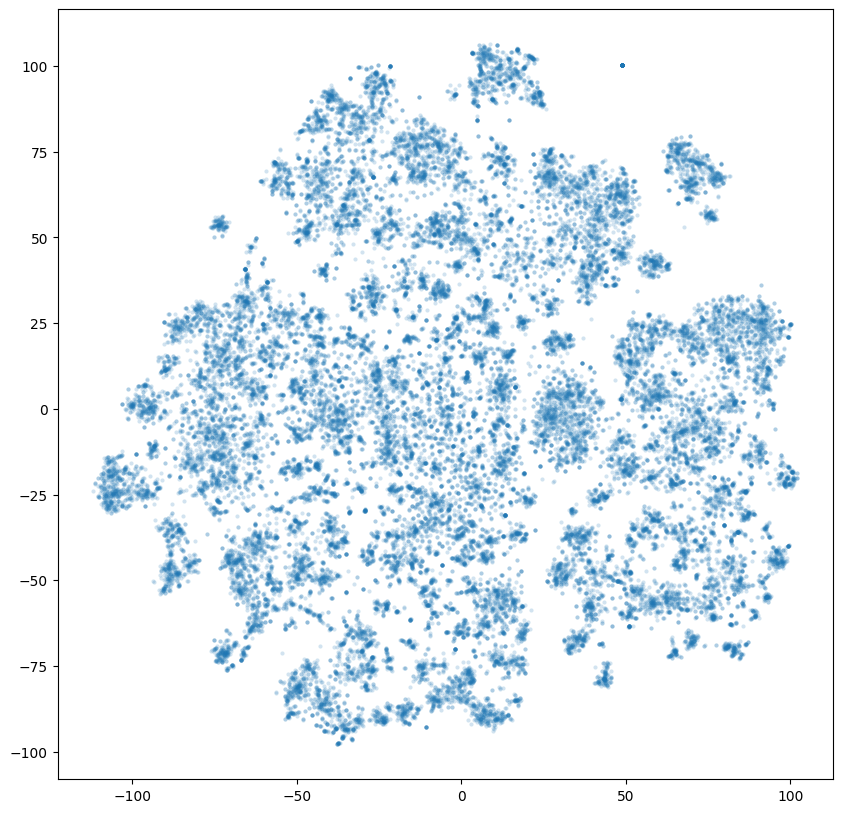

In [114]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

ax.scatter(X_embedded[:,0], X_embedded[:,1], marker='.', alpha=0.2, linewidths=0)